## waste management using cnn model

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')

In [8]:
train_path ='dataset/TRAIN'
test_path= 'dataset/TEST'

In [9]:
#importing tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation,Dropout,Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [10]:
#visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm (glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:12<00:00, 796.11it/s] 


In [11]:
data.shape

(22564, 2)

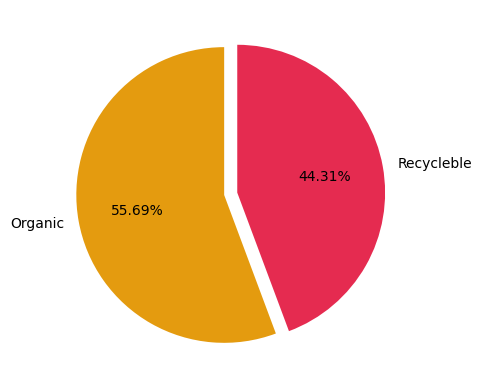

In [12]:
colors = ['#E49B0F' , '#E52B50']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recycleble'],autopct='%0.2f%%', colors=colors, startangle=90, explode = [0.03, 0.06])
plt.show()

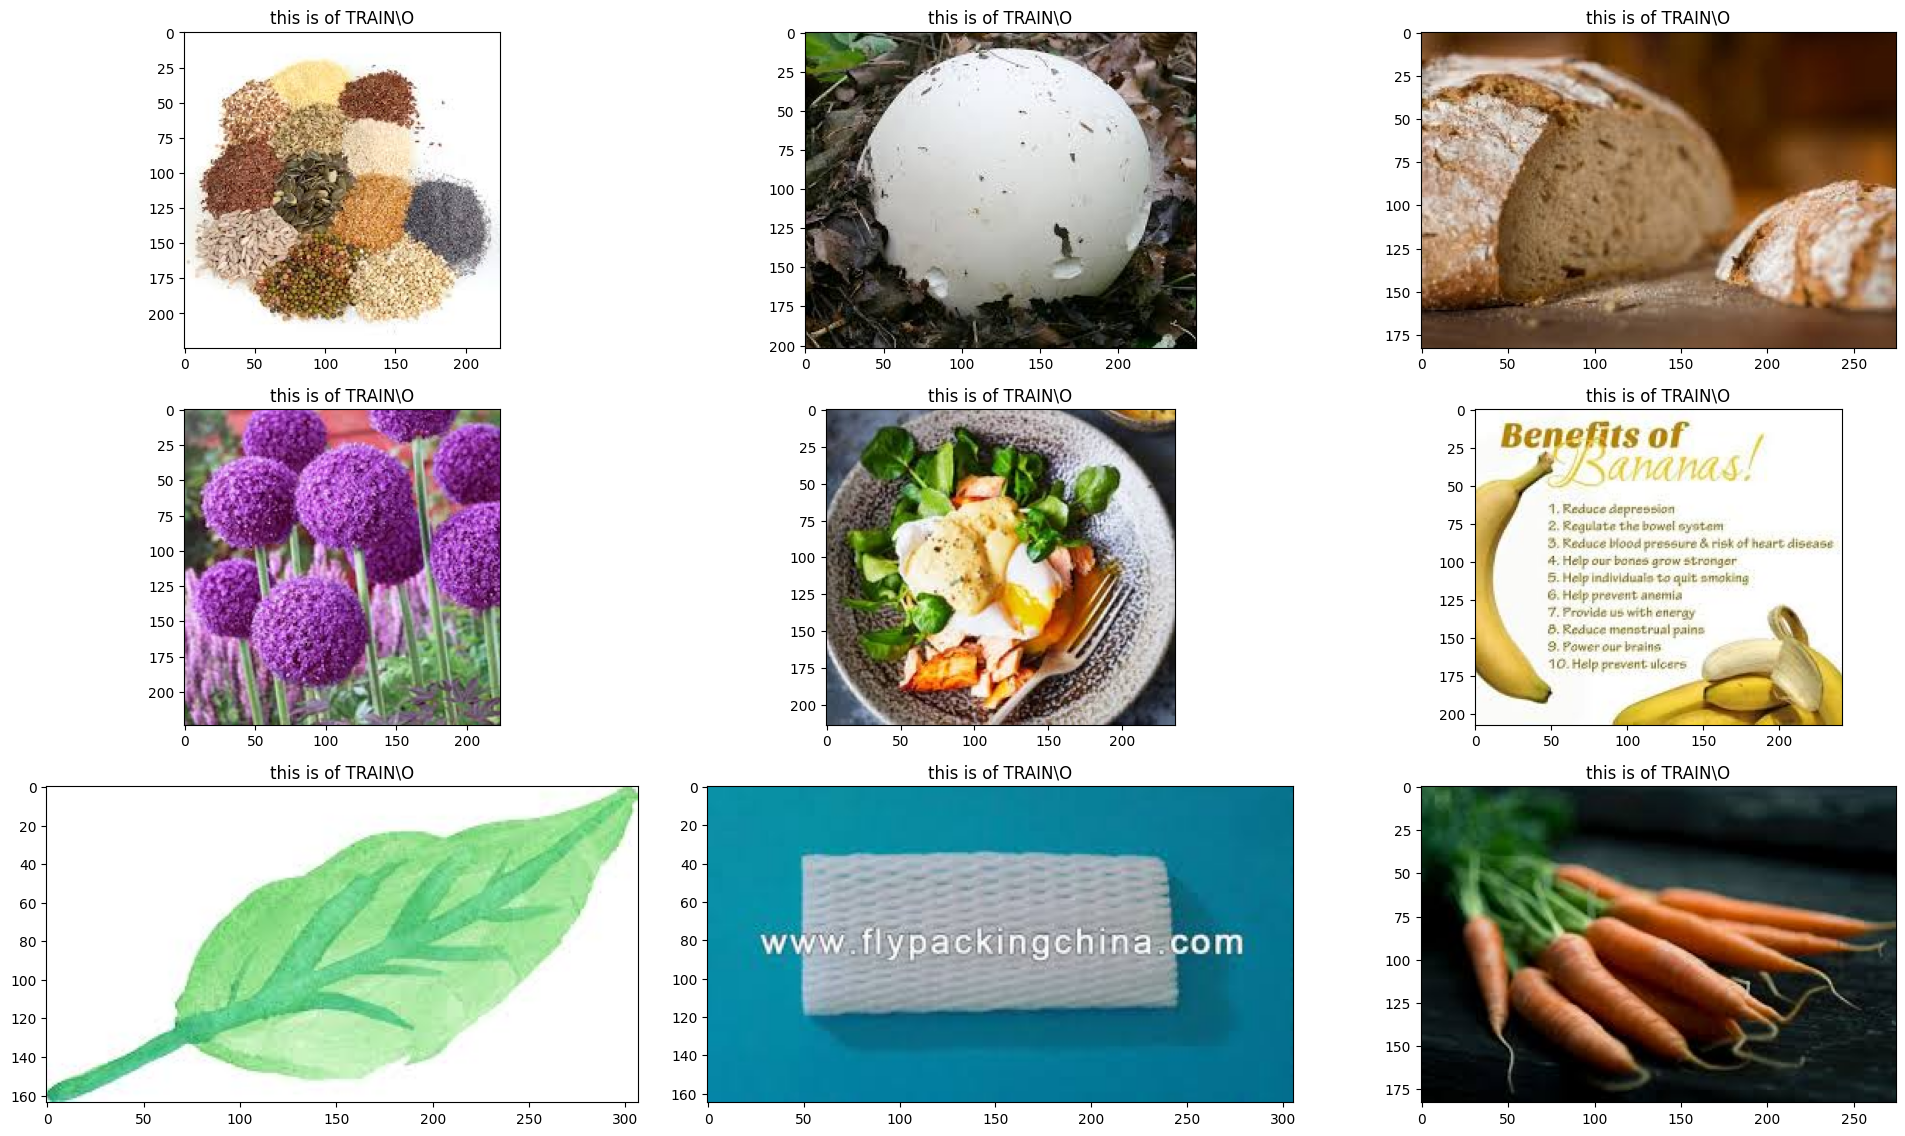

In [13]:
plt.figure(figsize=(20,15))
for i in range (9):
    plt.subplot(4, 3, (i%12)+1)
    index=np.random.randint(12000)
    plt.title('this is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()
              

## CNN - Convolutional Neural Network

In [20]:
model= Sequential()

model.add(Conv2D(32,(3,2), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer= "adam",
              metrics =["accuracy"])
batch_size = 64



In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 223, 32)   │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 222, 223, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,260,962 (84.92 MB)

 Trainable params: 22,260,962 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size= (224,224),
    batch_size = batch_size,
    color_mode= "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size= (224,224),
    batch_size = batch_size,
    color_mode= "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [25]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)

Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 509s 1s/step - accuracy: 0.7805 - loss: 0.5021 - val_accuracy: 0.8643 - val_loss: 0.3209
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 500s 1s/step - accuracy: 0.8411 - loss: 0.3837 - val_accuracy: 0.8834 - val_loss: 0.2952
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 496s 1s/step - accuracy: 0.8642 - loss: 0.3321 - val_accuracy: 0.8981 - val_loss: 0.2556
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 497s 1s/step - accuracy: 0.8834 - loss: 0.2999 - val_accuracy: 0.8774 - val_loss: 0.3119
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 494s 1s/step - accuracy: 0.9013 - loss: 0.2560 - val_accuracy: 0.9101 - val_loss: 0.2466
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 494s 1s/step - accuracy: 0.9195 - loss: 0.2131 - val_accuracy: 0.8830 - val_loss: 0.3228
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - accuracy: 0.9392 - loss: 0.1629 - val_accuracy: 0.8989 - val_loss: 0.3237
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - accuracy: 0.9563 - loss: 0.1237 - val_accu

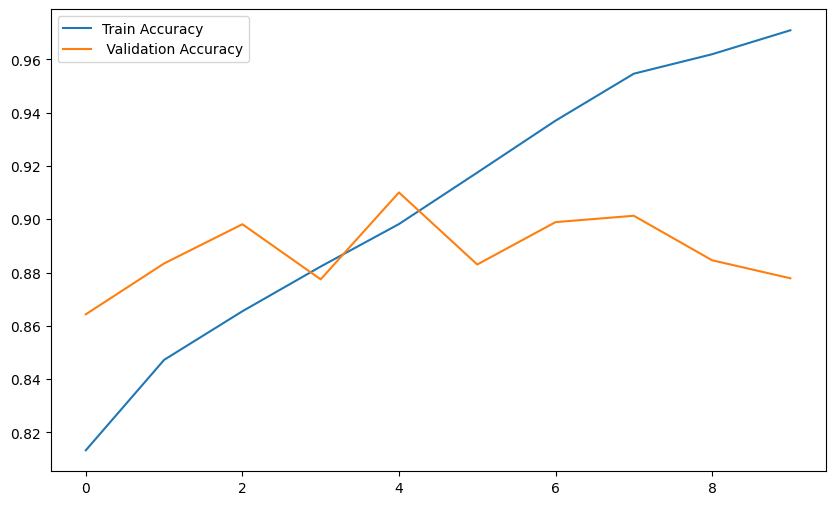

In [26]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label=' Validation Accuracy')
plt.legend()
plt.show()

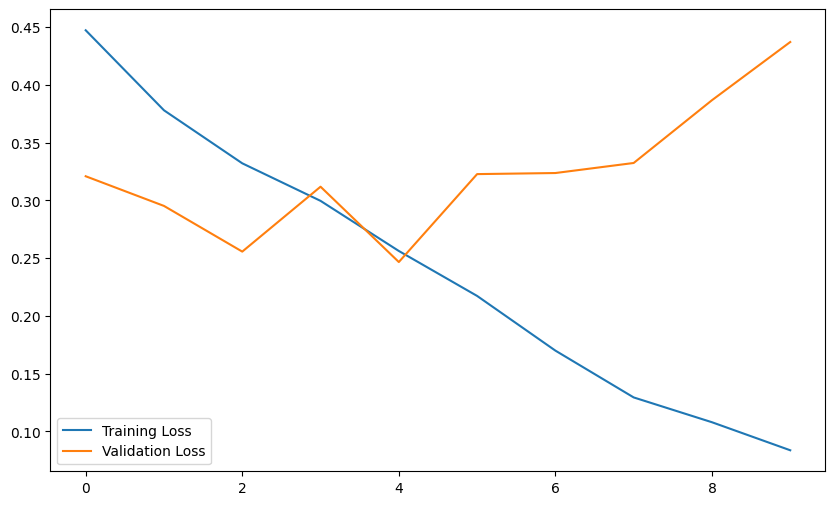

In [27]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [28]:
def predict_fun(img):
  plt.figure(figsize=(6, 4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print('The image shown is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
The image shown is Organic Waste


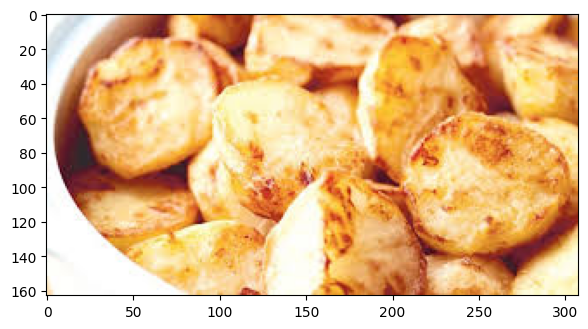

In [29]:
test_img = cv2.imread('O_12926.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The image shown is Recyclable Waste


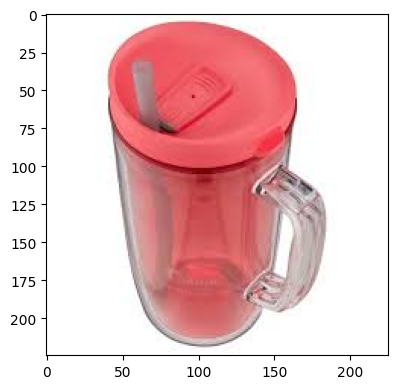

In [33]:
test_img = cv2.imread('R_10714.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The image shown is Organic Waste


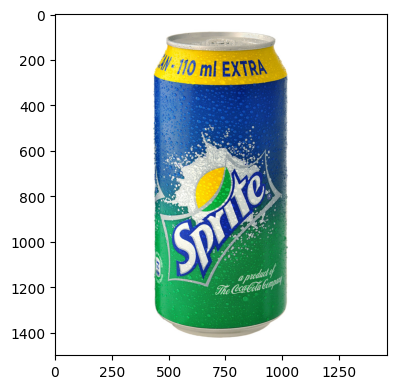

In [34]:
test_img = cv2.imread('R_11111.jpg')
predict_fun(test_img)